#Heart Disease UCI Prediction & Diagnosis
Using Logistic Regression
Code by Hardik :)
Dataset by Heart Disease UCI

Dataset Column Description:
age in years
sex (1 = male; 0 = female)
cp chest pain type
trestbps resting blood pressure (in mm Hg on admission to the hospital)
chol serum cholestoral in mg/dl
fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg resting electrocardiographic results
thalach maximum heart rate achieved
exang exercise induced angina (1 = yes; 0 = no)
oldpeak ST depression induced by exercise relative to rest
slope the slope of the peak exercise ST segment
ca number of major vessels (0-3) colored by flourosopy
thal
Value 0: NULL (dropped from the dataset previously) Value 1: fixed defect (no blood flow in some part of the heart) Value 2: normal blood flow Value 3: reversible defect (a blood flow is observed but it is not normal)

target 1 or 0

Context:
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

# Table of contents
1)Imports & reading dataset

(2)Data Description

(3)Data Analysis

(4)Data Visualization

(5)Data Pre-processing

(6)Logistic Regression

(7)Conclusion

# IMPORT READING DATASET 

In [151]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [150]:
data=pd.read_csv(r"C:\Users\45222\Dropbox\PC\Desktop\heart.csv")

In [13]:
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [14]:
data.tail()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0

# 2.Data Description

# * Describe
# There has been lot of confusion about the meta data, as there are various different meta data available out there. Over here below I have got the two most used meta data mentioned below. So we are going to follow the second description.

In [ ]:
# 1 - description

It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,
•    age: The person's age in years
•    sex: The person's sex (1 = male, 0 = female)
•    cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
•    trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
•    chol: The person's cholesterol measurement in mg/dl
•    fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
•    restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
•    thalach: The person's maximum heart rate achieved
•    exang: Exercise induced angina (1 = yes; 0 = no)
•    oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
•    slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
•    ca: The number of major vessels (0-3)
•    thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
•    target: Heart disease (0 = no, 1 = yes)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
data.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

# NULLS 

In [17]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:title={'center':'Finding Null Values Using Heatmap\n'}>

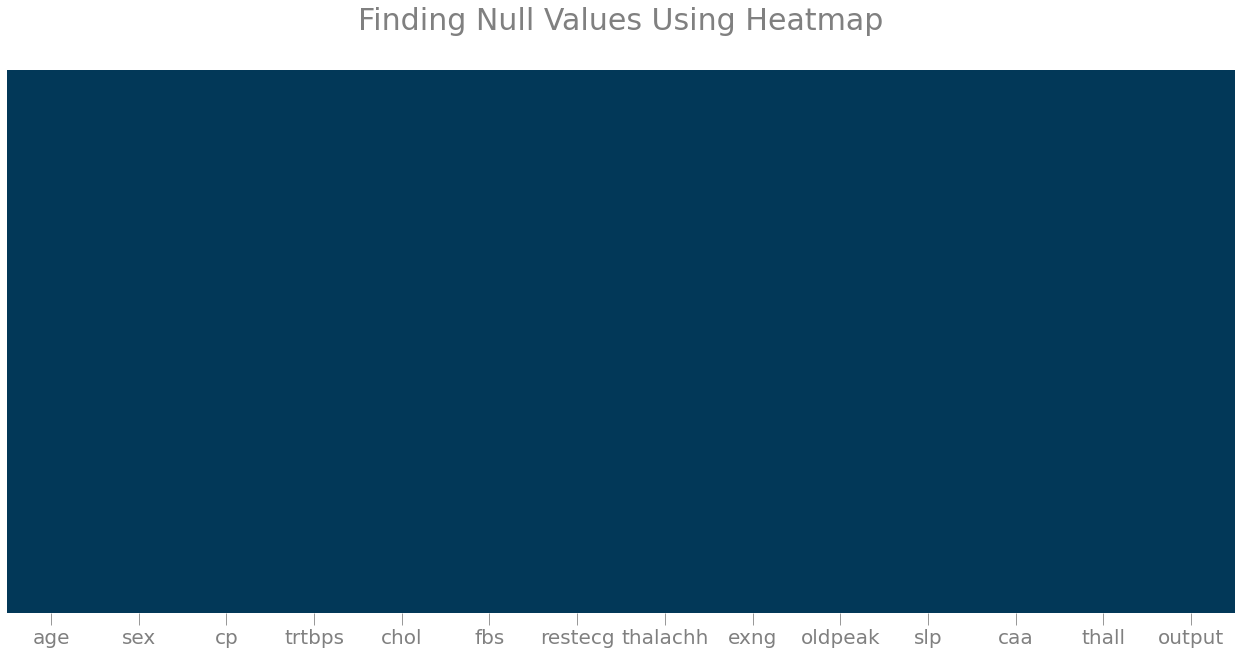

In [3]:
# visualizing null values if it exists
plt.figure(figsize=(22,10))

plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')

plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)

sns.heatmap(data.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

In [20]:
import pandas_profiling

report=pandas_profiling.ProfileReport(data,title='Pandas Profiling Report',explorative=True)

Pandas backend loaded 1.3.4
Numpy backend loaded 1.20.3
Pyspark backend NOT loaded
Python backend loaded


In [21]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 3.Data Analysis

In [23]:
# Feature Selection

1.Univariate Selection
Univariate Selction — Statistical tests may be used to pick certain features that have the best relationship to the performance variable. The scikit-learn library provides the SelectKBest class that can be used to select a specific number of features in a suite of different statistical tests. The following example uses the chi-squared (chi2) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = data.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

       Specs       Score
7   thalachh  188.320472
9    oldpeak   72.644253
11       caa   66.440765
2         cp   62.598098
8       exng   38.914377
4       chol   23.936394
0        age   23.286624
3     trtbps   14.823925
10       slp    9.804095
1        sex    7.576835
12     thall    5.791853
6    restecg    2.978271


2.Feature Importance

Feature Importance — You can gain the significance of each feature of your dataset by using the Model Characteristics property. Feature value gives you a score for every function of your results, the higher the score the more significant or appropriate the performance variable is. Feature importance is the built-in class that comes with Tree Based Classifiers, we will use the Extra Tree Classifier to extract the top 10 features for the dataset.

[0.0708259  0.053202   0.13704067 0.0600616  0.06088345 0.01903483
 0.03420543 0.08580526 0.0931768  0.09035759 0.07043783 0.12533062
 0.09963801]


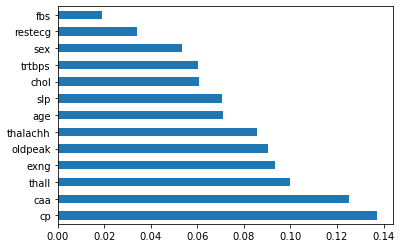

In [5]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

3.Correlation Matrix with Heatmap

Correlation Matrix with Heatmap — Correlation indicates how the features are related to each other or to the target variable. The correlation may be positive (increase in one value of the feature increases the value of the target variable) or negative (increase in one value of the feature decreases the value of the target variable) Heatmap makes it easy to classify the features are most relevant to the target variable, and we will plot the associated features of the heatmap using the seaborn library.

<AxesSubplot:>

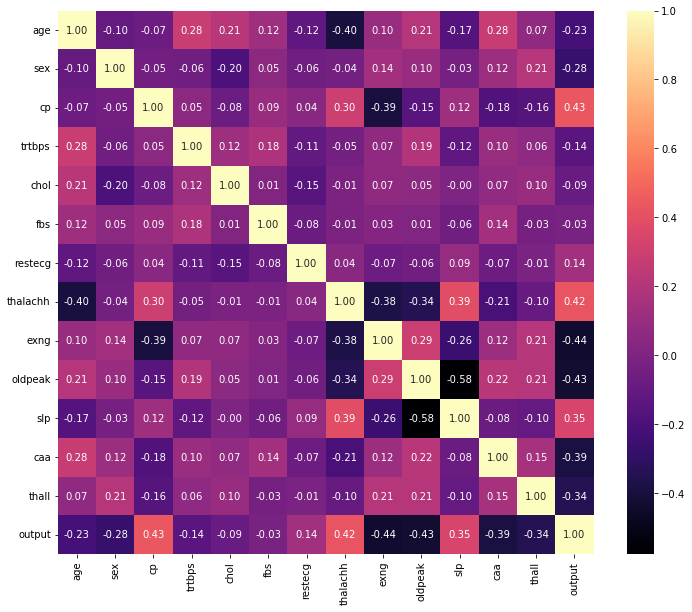

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap="magma",fmt='.2f')

In [7]:
for i in data.columns:
    print(i,len(data[i].unique()))

age 41
sex 2
cp 4
trtbps 49
chol 152
fbs 2
restecg 3
thalachh 91
exng 2
oldpeak 40
slp 3
caa 5
thall 4
output 2


# 4.Data Visualizaiton

In [8]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

# 1.Countplot

In [9]:
df2 = data.copy()

In [10]:
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)

In [11]:
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['output'] = df2['output'].apply(chng2)

Text(0.5, 1.0, 'Gender v/s output\n')

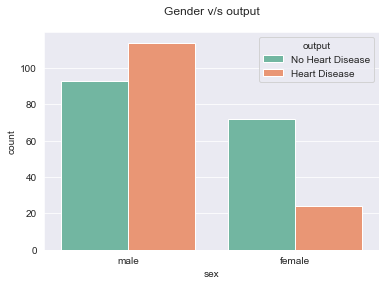

In [12]:
sns.countplot(data= df2, x='sex',hue='output')
plt.title('Gender v/s output\n')

Text(0.5, 1.0, 'Chest Pain Type v/s output\n')

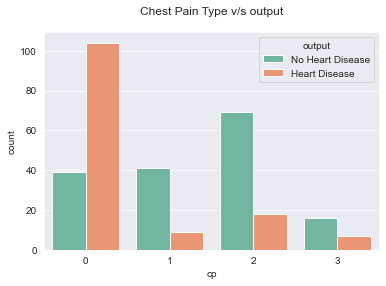

In [13]:
sns.countplot(data= df2, x='cp',hue='output')
plt.title('Chest Pain Type v/s output\n')

In [33]:
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

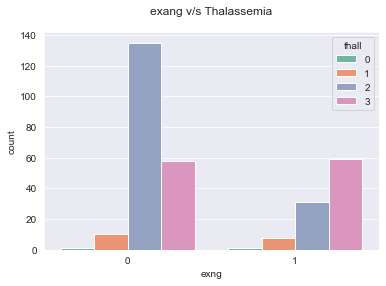

In [14]:
sns.countplot(data= df2, x='exng',hue='thall')
plt.title('exang v/s Thalassemia\n')

# 2 Distplot 

C:\Users\45222\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

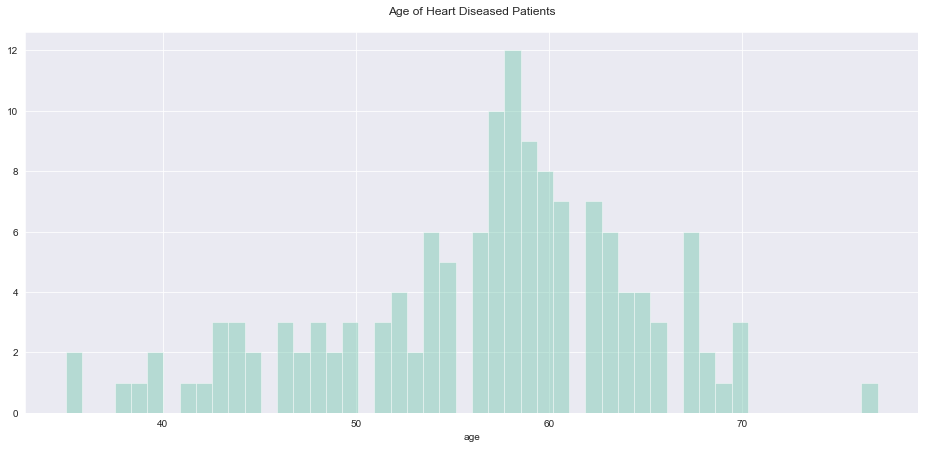

In [38]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['output']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

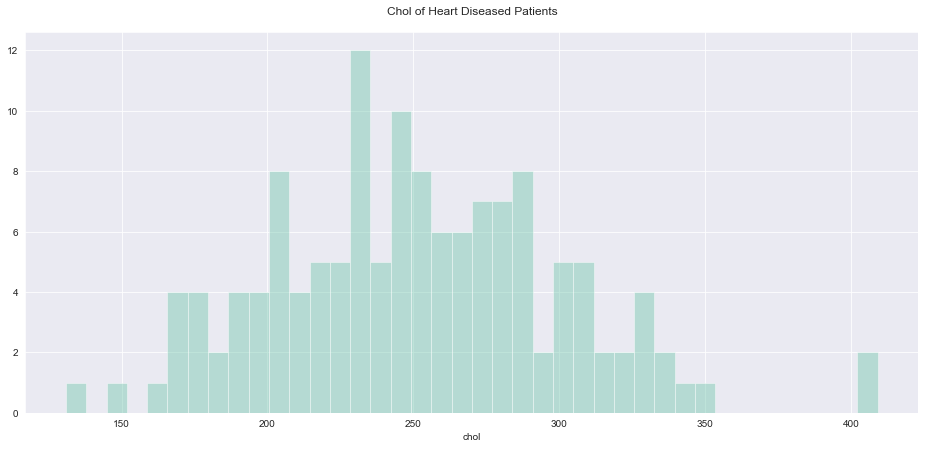

In [40]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['output']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

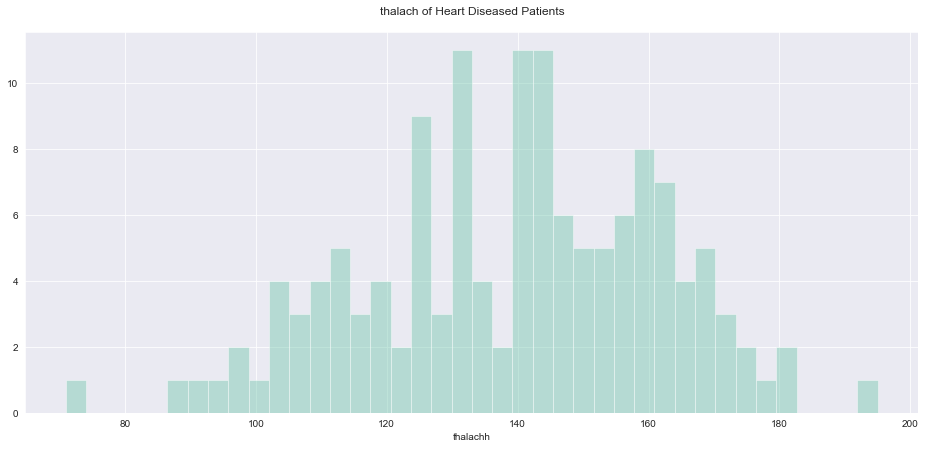

In [43]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['output']==0]['thalachh'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

# JOINTPLOT 

In [44]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [48]:
df3 = data[data['output'] == 0 ][['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']] #target 0 - people with heart disease

Age vs trestbps(Heart Diseased Patinets)


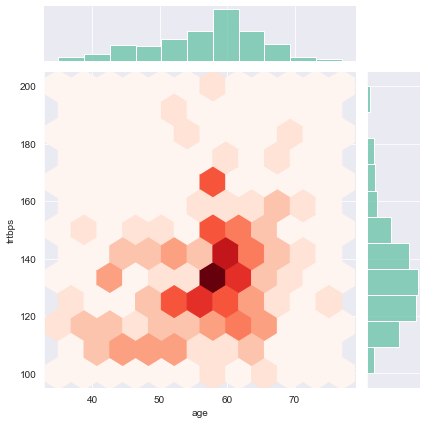

In [49]:
pal = sns.light_palette("blue", as_cmap=True)


print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3,
              x='age',
              y='trtbps',
              kind='hex',
              cmap='Reds'
           
              )

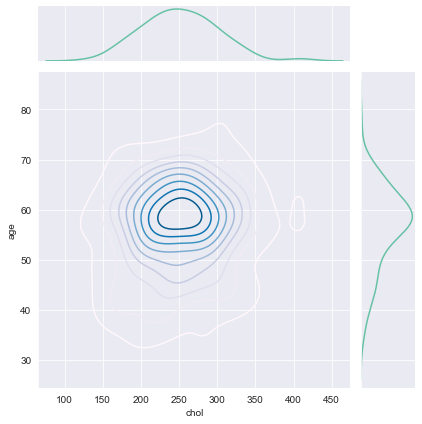

In [50]:
sns.jointplot(data=df3,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )


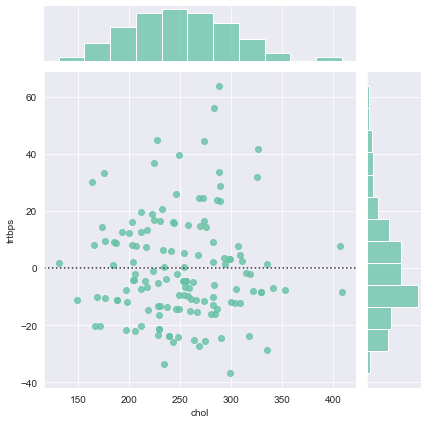

In [51]:

sns.jointplot(data=df3,
              x='chol',
              y='trtbps',
              kind='resid',
             
              )

# 4.Boxplot / violinplot 

<AxesSubplot:xlabel='output', ylabel='age'>

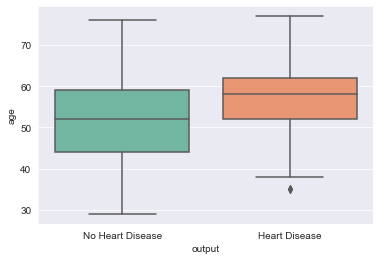

In [16]:
sns.boxplot(data=df2,x='output',y='age')

In [18]:
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

<AxesSubplot:xlabel='caa', ylabel='age'>

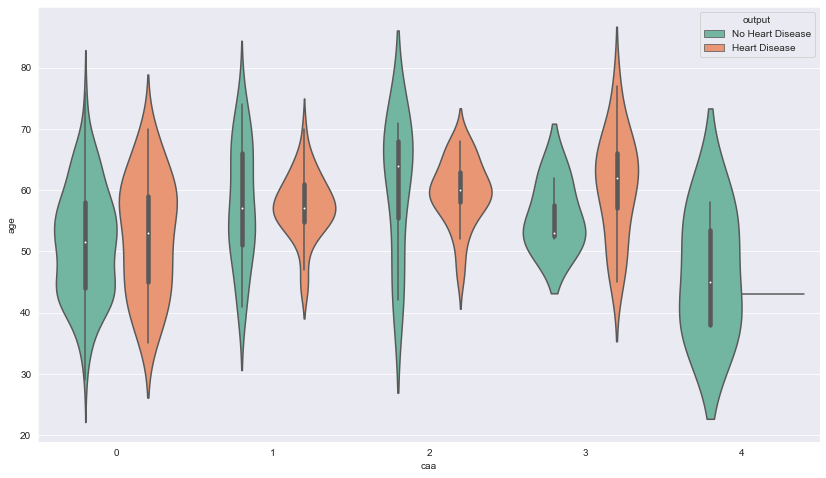

In [19]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df2,x='caa',y='age',hue='output')

<AxesSubplot:xlabel='cp', ylabel='thalachh'>

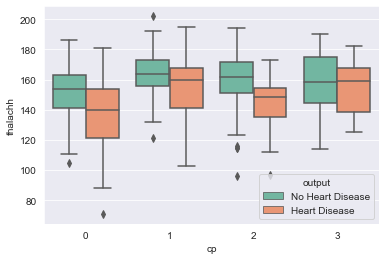

In [20]:
sns.boxplot(data=df2,x='cp',y='thalachh',hue='output')

<AxesSubplot:xlabel='fbs', ylabel='trtbps'>

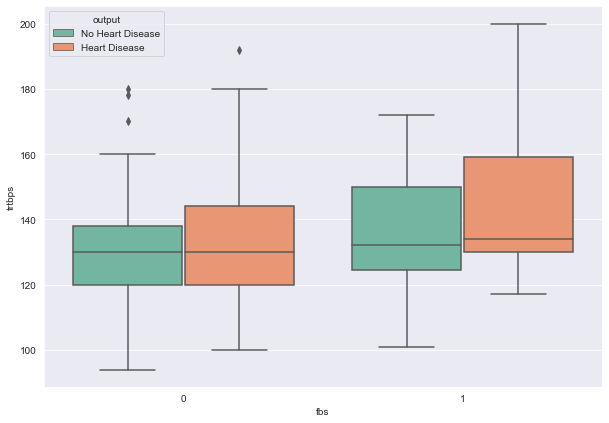

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='fbs',y='trtbps',hue='output')

<AxesSubplot:xlabel='thall', ylabel='oldpeak'>

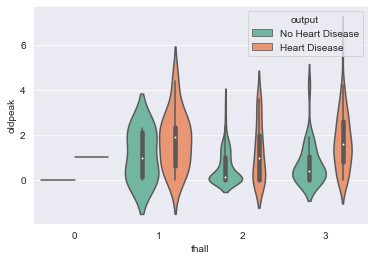

In [22]:
sns.violinplot(data=df2,x='thall',y='oldpeak',hue='output')

<AxesSubplot:xlabel='output', ylabel='thalachh'>

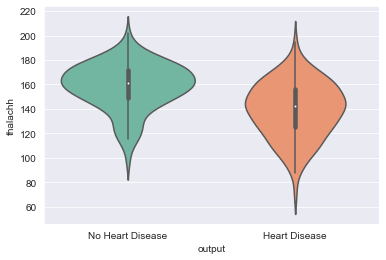

In [23]:
sns.violinplot(data=df2,x='output',y='thalachh')

# cluster map 

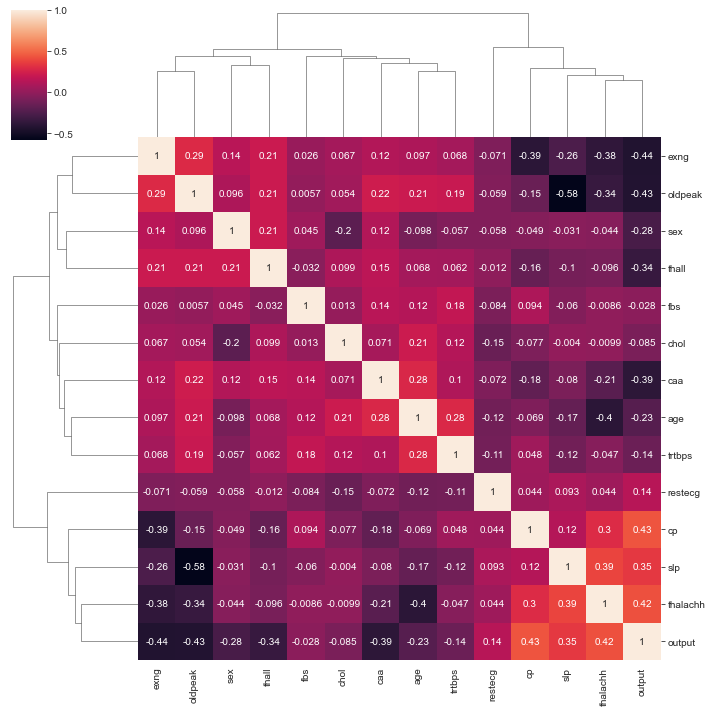

In [25]:
sns.clustermap(data.corr(),annot=True)

# 5 pairplot 

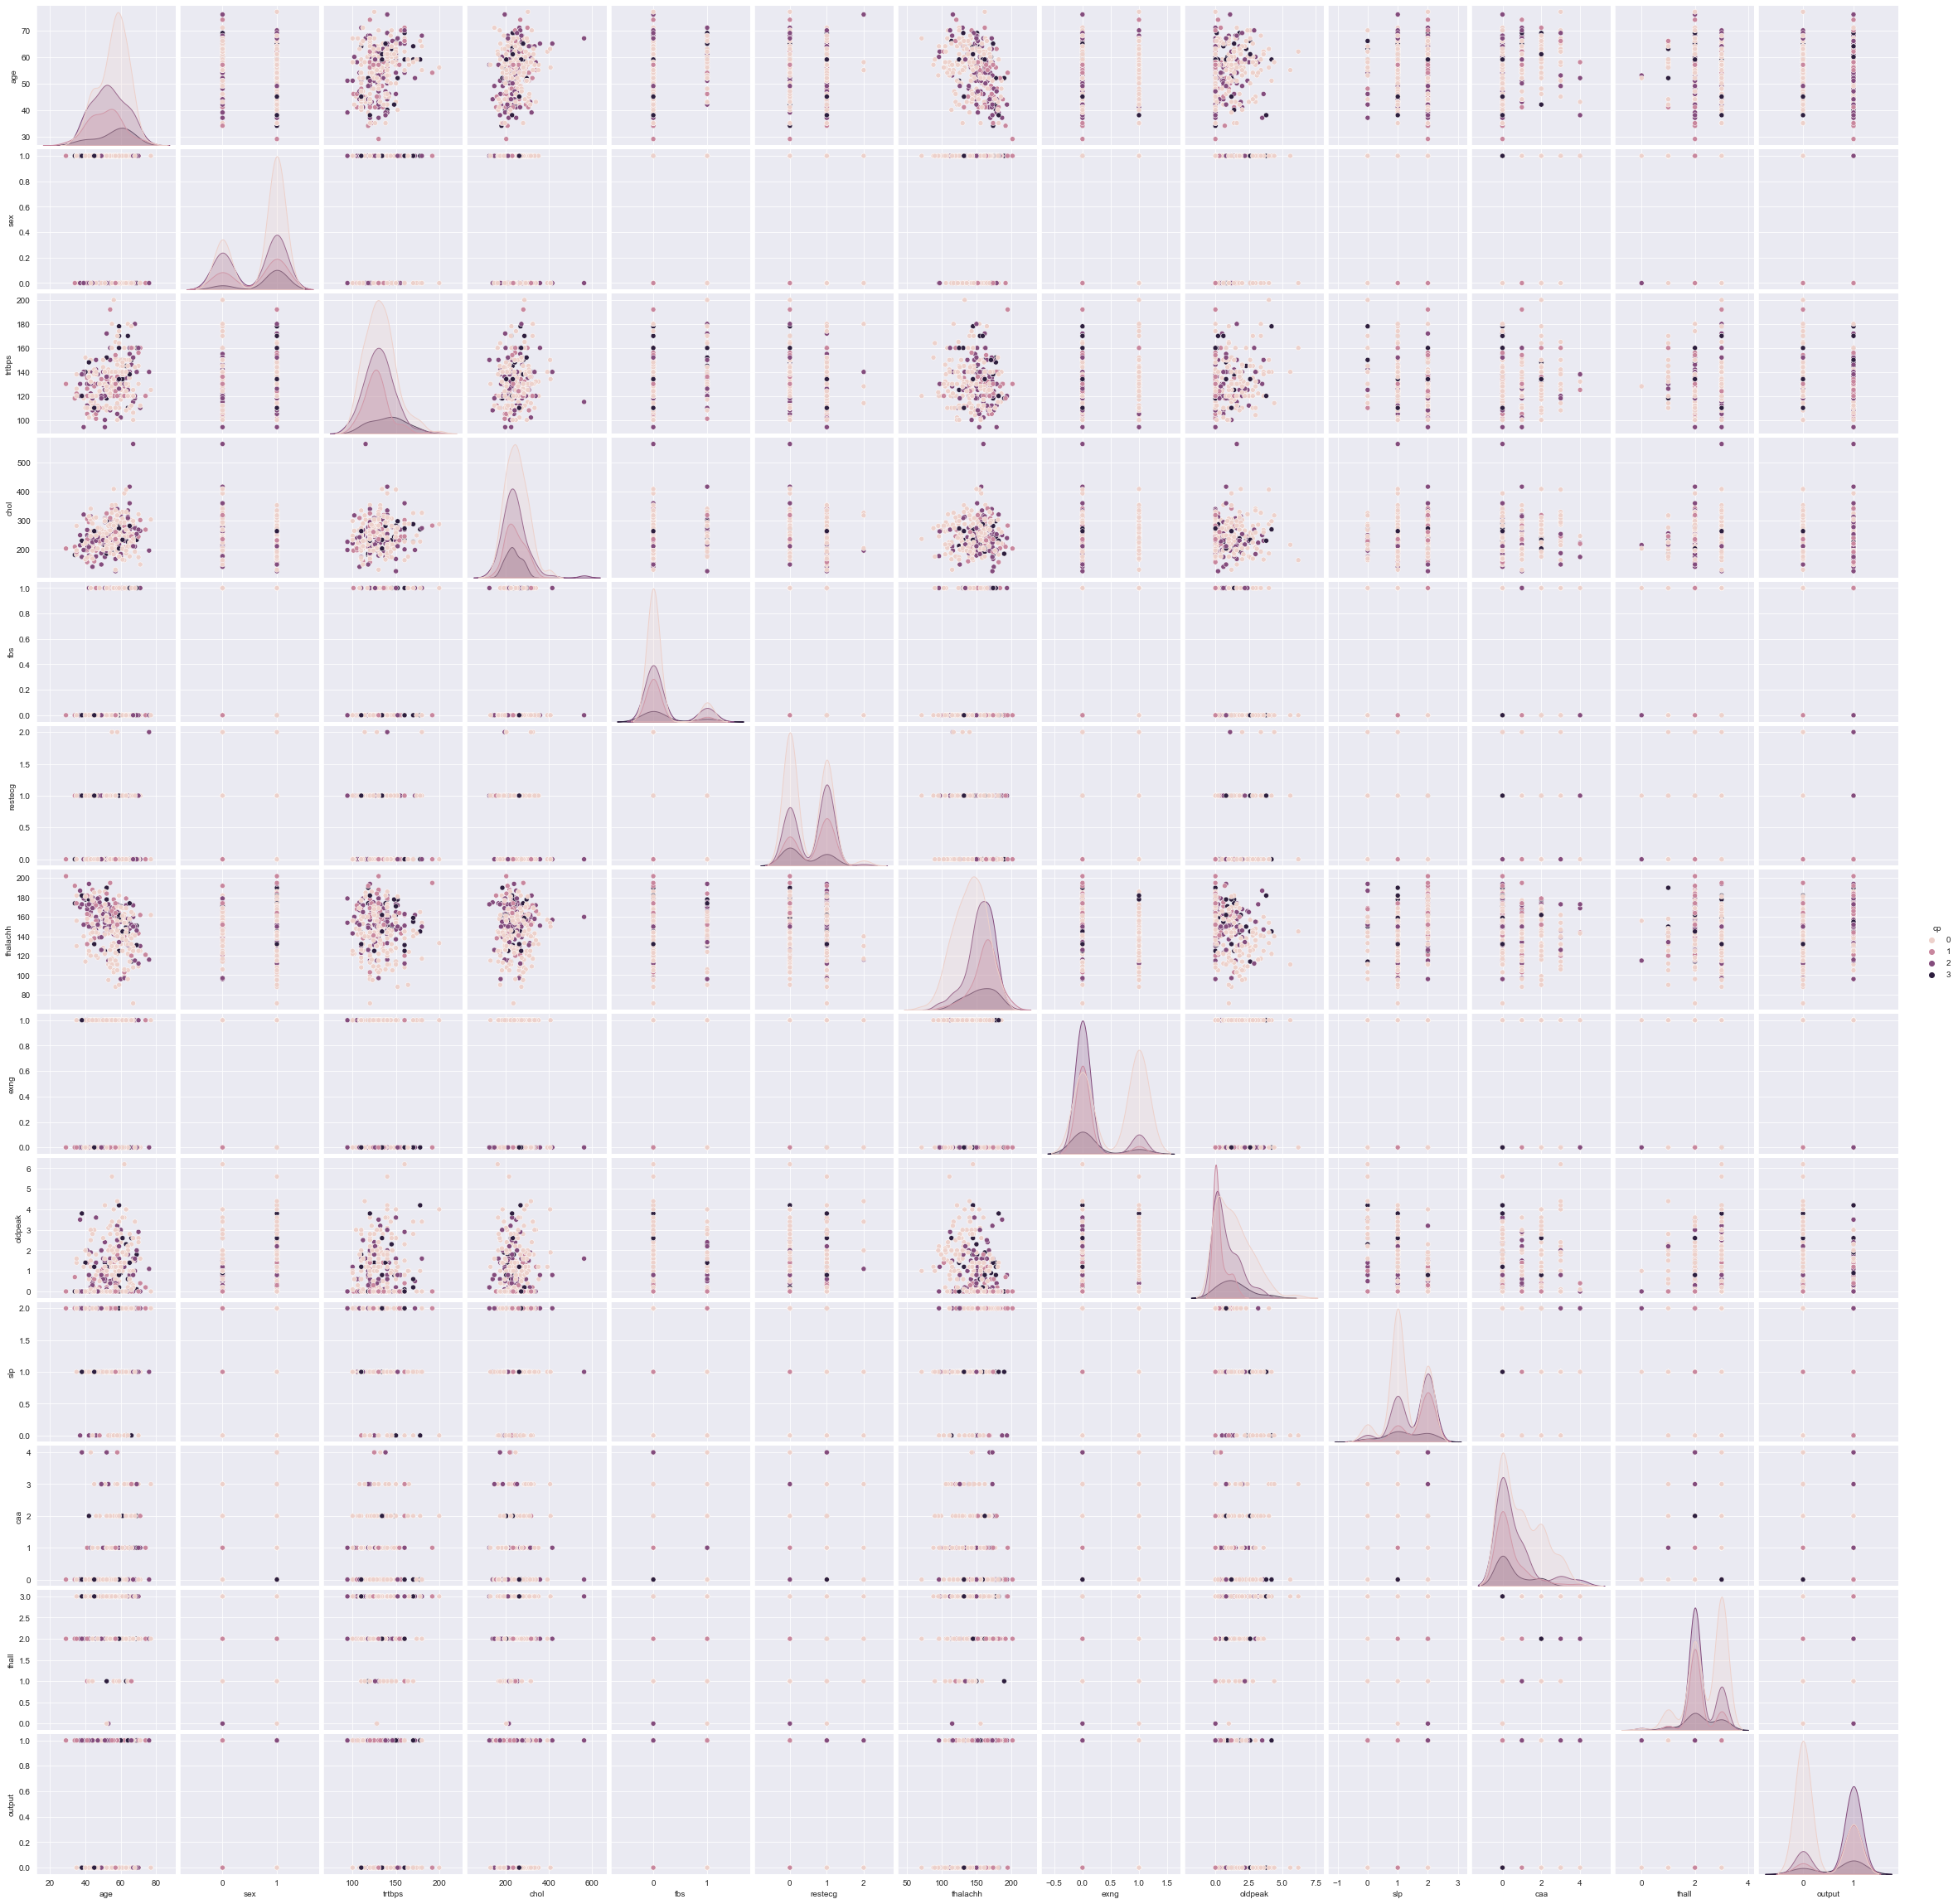

In [28]:
sns.pairplot(data,hue='cp')

# * Classification Tree 

In [32]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X = data.iloc[:,0:13] # Features
y = data.iloc[:,13] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [33]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7472527472527473


In [35]:
feature_cols = ['age', 'sex', 'cp', 'trestbps','chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

In [47]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols  ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())
#### ??? 

InvocationException: GraphViz's executables not found

In [48]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7362637362637363


In [50]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# .Data Pre-processing 

In [52]:
# * Pre-processing
# Change Name of the column 

In [152]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

We have 4 Categorical columns as seen in Data Description using pandas profiling:

cp - chest_pain_type

restecg - rest_ecg_type

slope - st_slope_type

thal - thalassemia_type

Generating categorical columns values

In [153]:
#cp - chest_pain_type
data.loc[data['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
data.loc[data['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
data.loc[data['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
data.loc[data['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'

#restecg - rest_ecg_type
data.loc[data['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
data.loc[data['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
data.loc[data['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'

#slope - st_slope_type
data.loc[data['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
data.loc[data['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
data.loc[data['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

#thal - thalassemia_type
data.loc[data['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
data.loc[data['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
data.loc[data['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
data.loc[data['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'



In [59]:
data.head()

age  sex   chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1    typical angina                     145          233   
1   37    1  non-anginal pain                     130          250   
2   41    0   atypical angina                     130          204   
3   56    1   atypical angina                     120          236   
4   57    0      asymptomatic                     120          354   

   fasting_blood_sugar                 rest_ecg_type  max_heart_rate_achieved  \
0                    1  left ventricular hypertrophy                      150   
1                    0                        normal                      187   
2                    0  left ventricular hypertrophy                      172   
3                    0                        normal                      178   
4                    0                        normal                      163   

   exercise_induced_angina  st_depression st_slope_type  num_major_vessels  \
0                        0            2.3   downsloping                  0   
1                        0            3.5   downsloping                  0   
2                        0            1.4     upsloping                  0   
3                        0            0.8     upsloping                  0   
4                        1            0.6     upsloping                  0   

  thalassemia_type  target  
0     fixed defect       1  
1           normal       1  
2           normal       1  
3           normal       1  
4           normal       1

#  One Hot Encoding

In [156]:
data2 = pd.get_dummies(data, drop_first=False)
data2.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed defect',
       'thalassemia_type_normal', 'thalassemia_type_nothing',
       'thalassemia_type_reversable defect'],
      dtype='object')

In [158]:
df_temp = data2['thalassemia_type_fixed defect']

In [159]:
data2 = pd.get_dummies(data, drop_first=True)

In [160]:
data2.head()

age  sex  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
0   63    1                     145          233                    1   
1   37    1                     130          250                    0   
2   41    0                     130          204                    0   
3   56    1                     120          236                    0   
4   57    0                     120          354                    0   

   max_heart_rate_achieved  exercise_induced_angina  st_depression  \
0                      150                        0            2.3   
1                      187                        0            3.5   
2                      172                        0            1.4   
3                      178                        0            0.8   
4                      163                        1            0.6   

   num_major_vessels  target  chest_pain_type_atypical angina  \
0                  0       1                                0   
1                  0       1                                0   
2                  0       1                                1   
3                  0       1                                1   
4                  0       1                                0   

   chest_pain_type_non-anginal pain  chest_pain_type_typical angina  \
0                                 0                               1   
1                                 1                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   rest_ecg_type_left ventricular hypertrophy  rest_ecg_type_normal  \
0                                           1                     0   
1                                           0                     1   
2                                           1                     0   
3                                           0                     1   
4                                           0                     1   

   st_slope_type_flat  st_slope_type_upsloping  thalassemia_type_normal  \
0                   0                        0                        0   
1                   0                        0                        1   
2                   0                        1                        1   
3                   0                        1                        1   
4                   0                        1                        1   

   thalassemia_type_nothing  thalassemia_type_reversable defect  
0                         0                                   0  
1                         0                                   0  
2                         0                                   0  
3                         0                                   0  
4                         0                                   0

Since one hot encoding dropped "thalassemia_type_fixed defect" column which was a useful column compared to 'thalassemia_type_nothing' which is a null column, we dropped 'thalassemia_type_nothing' and concatinated 'thalassemia_type_fixed defect'

In [161]:
frames = [data2, df_temp]
result = pd.concat(frames,axis=1)

result.head()

age  sex  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
0   63    1                     145          233                    1   
1   37    1                     130          250                    0   
2   41    0                     130          204                    0   
3   56    1                     120          236                    0   
4   57    0                     120          354                    0   

   max_heart_rate_achieved  exercise_induced_angina  st_depression  \
0                      150                        0            2.3   
1                      187                        0            3.5   
2                      172                        0            1.4   
3                      178                        0            0.8   
4                      163                        1            0.6   

   num_major_vessels  target  ...  chest_pain_type_non-anginal pain  \
0                  0       1  ...                                 0   
1                  0       1  ...                                 1   
2                  0       1  ...                                 0   
3                  0       1  ...                                 0   
4                  0       1  ...                                 0   

   chest_pain_type_typical angina  rest_ecg_type_left ventricular hypertrophy  \
0                               1                                           1   
1                               0                                           0   
2                               0                                           1   
3                               0                                           0   
4                               0                                           0   

   rest_ecg_type_normal  st_slope_type_flat  st_slope_type_upsloping  \
0                     0                   0                        0   
1                     1                   0                        0   
2                     0                   0                        1   
3                     1                   0                        1   
4                     1                   0                        1   

   thalassemia_type_normal  thalassemia_type_nothing  \
0                        0                         0   
1                        1                         0   
2                        1                         0   
3                        1                         0   
4                        1                         0   

   thalassemia_type_reversable defect  thalassemia_type_fixed defect  
0                                   0                              1  
1                                   0                              0  
2                                   0                              0  
3                                   0                              0  
4                                   0                              0  

[5 rows x 21 columns]

In [162]:
result.drop('thalassemia_type_nothing',axis=1,inplace=True)
resultc = result.copy()

# 6.Logistic Regression

1.Gather columns

In [72]:
result.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed defect',
       'thalassemia_type_normal', 'thalassemia_type_reversable defect',
       'thalassemia_type_fixed defect'],
      dtype='object')

In [163]:
X = result.drop('target', axis = 1)

In [164]:
y = result['target']

# 2.Splitting Data 

In [165]:
from sklearn.model_selection import train_test_split



In [166]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


# 3.Normalization 

In [167]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

# 4.Fitting into Model

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
logre = LogisticRegression()

In [170]:
logre.fit(X_train,y_train)

LogisticRegression()

# 5.Prediction

In [171]:
y_pred = logre.predict(X_test)
#???????? 

In [172]:
actual = []
predcition = []

for i,j in zip(y_test,y_pred):
  actual.append(i)
  predcition.append(j) 

dic = {'Actual':actual,
       'Prediction':predcition
       }


In [173]:
result  = pd.DataFrame(dic)

In [174]:
import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Pred'))

# 6.Model Evaluation

In [175]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))   # ??????

0.8360655737704918


In [176]:
print(y_test.shape)
print(y_pred.shape)

(61,)
(61,)


In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



[[23  5]
 [ 5 28]]


<AxesSubplot:>

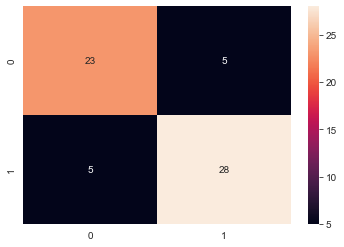

In [178]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

# ROC Curve

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

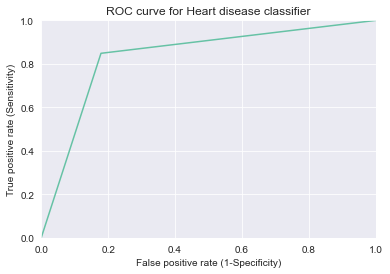

In [179]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [180]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)

0.83495670995671

# 7.Conclusion

In [140]:
#1.Coefficients

In [181]:
print(logre.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[0.96594585]


Coeffecient
chest_pain_type_non-anginal pain               1.664112
chest_pain_type_typical angina                 0.930263
max_heart_rate_achieved                        0.654074
thalassemia_type_normal                        0.635533
chest_pain_type_atypical angina                0.541237
rest_ecg_type_normal                           0.480371
st_slope_type_upsloping                        0.444377
thalassemia_type_fixed defect                  0.403329
fasting_blood_sugar                            0.252094
cholesterol                                   -0.200562
rest_ecg_type_left ventricular hypertrophy    -0.228420
age                                           -0.347387
st_slope_type_flat                            -0.494994
resting_blood_pressure                        -0.671762
sex                                           -0.749310
thalassemia_type_reversable defect            -0.828712
exercise_induced_angina                       -1.201007
st_depression                                 -1.415380
num_major_vessels                             -1.831475

<Figure size 720x864 with 0 Axes>

In [142]:
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed defect',
       'thalassemia_type_normal', 'thalassemia_type_nothing',
       'thalassemia_type_reversable defect'],
      dtype='object')

In [182]:
df4 = data[data['target'] == 0 ][['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']] #target 0 - people with heart disease

# 2.Analysis

C:\Users\45222\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='max_heart_rate_achieved', ylabel='Density'>

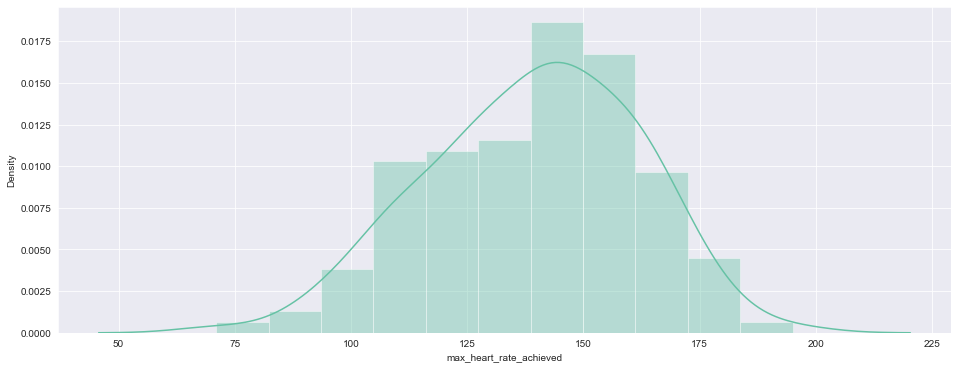

In [183]:
plt.figure(figsize=(16,6))
sns.distplot(df4['max_heart_rate_achieved'])

# Heart Diseased Patients visualization 

<AxesSubplot:xlabel='rest_ecg_type', ylabel='cholesterol'>

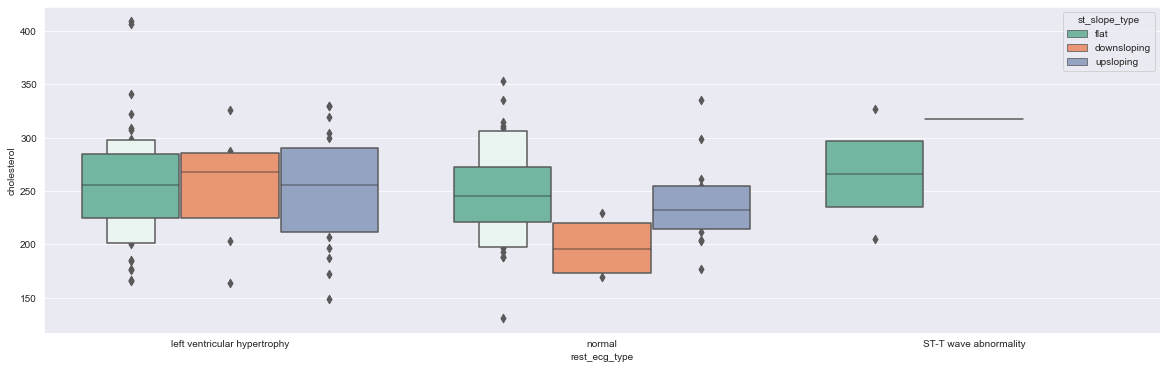

In [184]:
plt.figure(figsize=(20,6))
sns.boxenplot(data=df4,x='rest_ecg_type',y='cholesterol',hue='st_slope_type')

<AxesSubplot:xlabel='chest_pain_type', ylabel='max_heart_rate_achieved'>

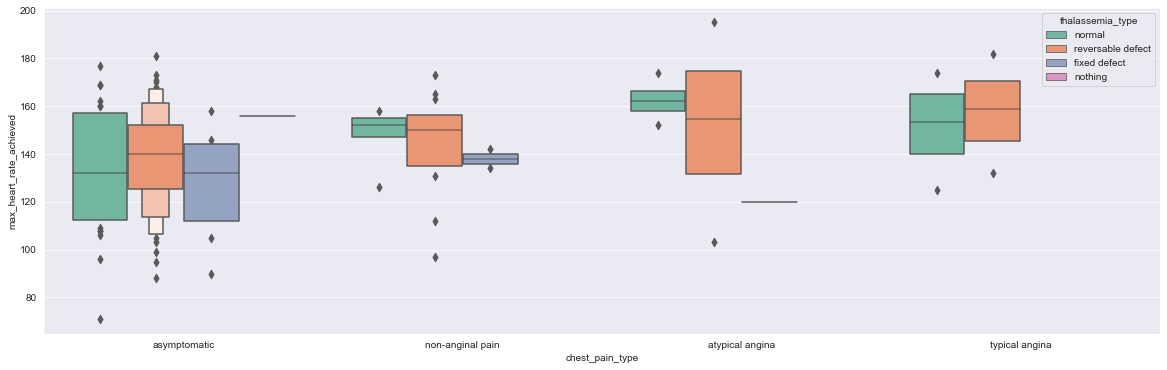

In [185]:
plt.figure(figsize=(20,6))
sns.boxenplot(data=df4,x='chest_pain_type',y='max_heart_rate_achieved',hue='thalassemia_type')

# Shap

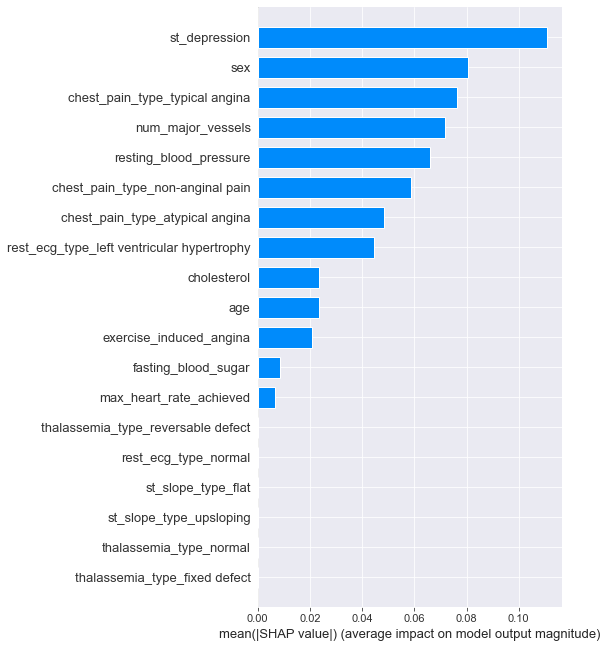

In [186]:
!pip install shap 
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test,check_additivity=False)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# Shap value for Model Explaination

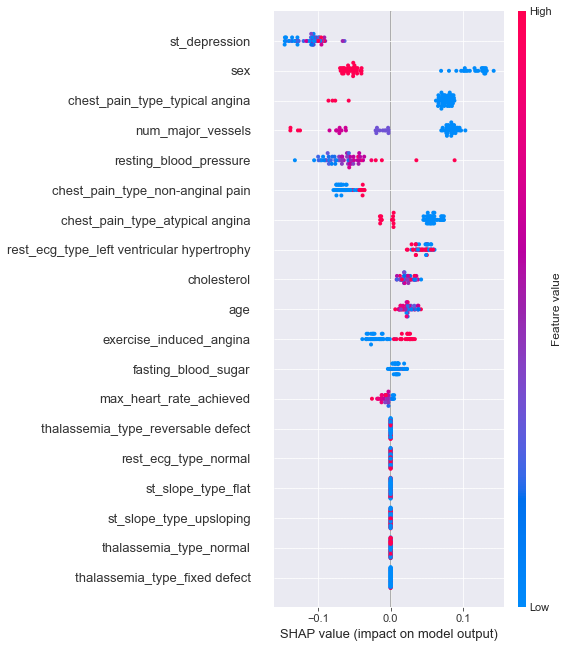

In [187]:
shap.summary_plot(shap_values[1], X_test)

In [188]:
def patient_analysis(model, patient):
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(patient)
  shap.initjs()
  return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

# Reports for two Patients

In [190]:
patients = X_test.iloc[3,:].astype(float)
patients_target = y_test.iloc[3:4]
print('Target : ',int(patients_target))
patient_analysis(model, patients)

Target :  1


In [191]:
patients = X_test.iloc[33,:].astype(float)
patients_target = y_test.iloc[33:34]
print('Target : ',int(patients_target))
patient_analysis(model, patients)

Target :  0


In [192]:
 y_test.iloc[10:11]

177    0
Name: target, dtype: int64

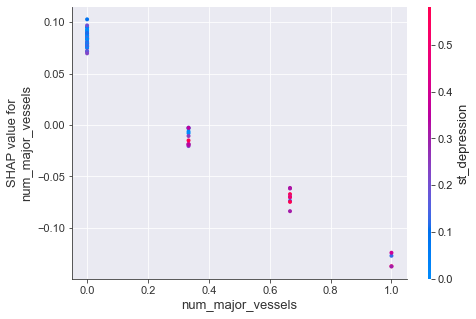

In [193]:
# dependence plot

shap.dependence_plot('num_major_vessels', shap_values[1], X_test, interaction_index = "st_depression")

In [195]:
shap_values = explainer.shap_values(X_train.iloc[:50],check_additivity=False)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:50])

# 3.Conclusion 

The Area under the ROC curve is 87.09% which is somewhat satisfactory.
The model predicted with 86.88% accuracy. The model is more specific than sensitive.
According to this model the major features contributing in precision of predciting model are shown in the heatmap in order.

<AxesSubplot:>

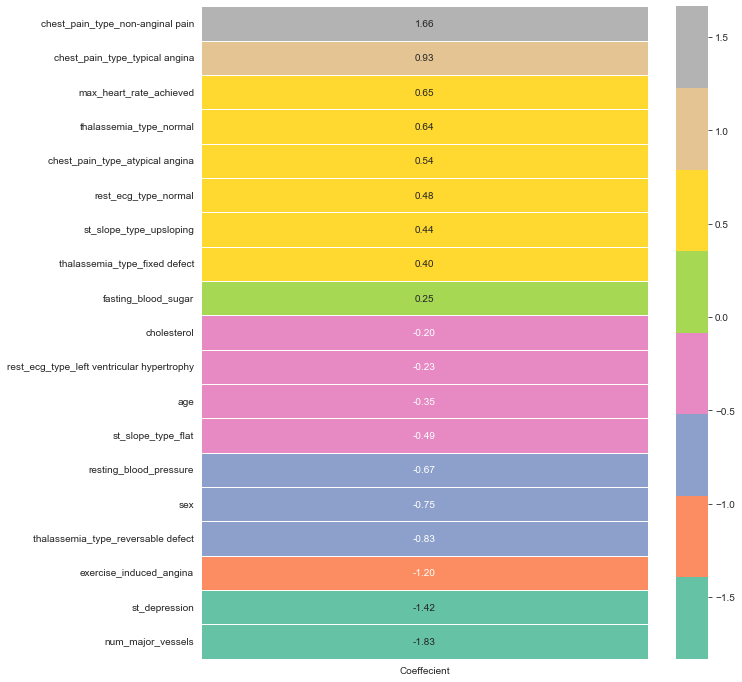

In [196]:
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
sns.heatmap(coeffecients,annot=True,fmt='.2f',cmap='Set2',linewidths=0.5)